# Programación analítica

Se adjunta la base de datos donde viene las respuestas de los clientes mostrando que tan de acuerdo están con las afirmaciones que le preguntaban y esta se evalúa del 1 al 5, donde 1 es muy en desacuerdo y 5 es muy de acuerdo.

## Exploratorio

Explore los datos y resuma en máximo 4 gráficos los hallazgos más importantes es su análisis exploratorio. Incluya filtros y navegación de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('Datos Prueba Fix.csv', sep=";")
dict_col = pd.read_excel('Diccionario prueba FIX.xlsx')

Una mirada muy general a los datos:

In [3]:
df1 = df.describe(include = 'all')

df1.loc['dtype'] = df.dtypes
df1.loc['size'] = len(df)
df1.loc['NaNs'] = df.isnull().sum(axis=0)

df1.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,size,NaNs
D1,1998.0,NaN,NaN,NaN,1.138639,0.352825,1.0,1.0,1.0,1.0,3.0,int64,1998,0
D2,1996.0,NaN,NaN,NaN,3.377756,1.361698,1.0,2.0,3.0,4.0,7.0,float64,1998,2
D3,1993.0,NaN,NaN,NaN,1.055193,0.228414,1.0,1.0,1.0,1.0,2.0,float64,1998,5
D4,1998.0,NaN,NaN,NaN,7.508509,2.386046,1.0,7.0,7.0,8.0,16.0,int64,1998,0
D5,1998.0,NaN,NaN,NaN,1.478979,0.499683,1.0,1.0,1.0,2.0,2.0,int64,1998,0
D6,1998.0,NaN,NaN,NaN,2.316817,1.334878,1.0,1.0,2.0,3.0,6.0,int64,1998,0
D7,1994.0,NaN,NaN,NaN,2.57322,1.00969,1.0,1.0,3.0,3.0,4.0,float64,1998,4
D8,1991.0,NaN,NaN,NaN,2.581617,0.983402,1.0,2.0,3.0,3.0,4.0,float64,1998,7
P1,1995.0,NaN,NaN,NaN,2.425063,0.541899,1.0,2.0,2.0,3.0,4.0,float64,1998,3
P2,1998.0,NaN,NaN,NaN,7.522523,223.663017,1.0,2.0,3.0,3.0,10000.0,int64,1998,0


1. Hay columnas que fueron leídas como 'object', por presencia de datos que no son numéricos
1. Es claro que hay valores fuera de rango, probablemente debido a una mala digitación. Por ejemplo, 5000 debe ser equivalente a 5, 10=1, -4=4, etc. En este caso, se podría intentar reparar el problema, o descartar dichos valores.
1. Hay columnas con valores pérdidos o NaNs

Para resolver 1., se forzarán a númericos. Para resolver 2., se transformarán a NaNs aquellos valores que sean menores a 1 y mayores a 5 (se podrían intentar corregirlos/imputarlos, pero por tiempo no se usará esa aproximación). Esto último sólo se hará en las columnas PXX, que son las que se saben están entre 1 y 5.

In [4]:
tofix = df1.loc[:, df1.T.dtype == 'object'].columns
for col in tofix:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
p_cols = [c for c in df.columns if c.startswith('P')]
df[p_cols] = df[p_cols].mask((df[p_cols] > 5) | (df[p_cols] < 1))

In [5]:
df1 = df.describe(include = 'all')

df1.loc['dtype'] = df.dtypes
df1.loc['size'] = len(df)
df1.loc['NaNs'] = df.isnull().sum(axis=0)

df1.T

,count,mean,std,min,25%,50%,75%,max,dtype,size,NaNs
D1,1998.0,1.138639,0.352825,1.0,1.0,1.0,1.0,3.0,int64,1998,0
D2,1996.0,3.377756,1.361698,1.0,2.0,3.0,4.0,7.0,float64,1998,2
D3,1993.0,1.055193,0.228414,1.0,1.0,1.0,1.0,2.0,float64,1998,5
D4,1998.0,7.508509,2.386046,1.0,7.0,7.0,8.0,16.0,int64,1998,0
D5,1998.0,1.478979,0.499683,1.0,1.0,1.0,2.0,2.0,int64,1998,0
D6,1998.0,2.316817,1.334878,1.0,1.0,2.0,3.0,6.0,int64,1998,0
D7,1994.0,2.57322,1.00969,1.0,1.0,3.0,3.0,4.0,float64,1998,4
D8,1991.0,2.581617,0.983402,1.0,2.0,3.0,3.0,4.0,float64,1998,7
P1,1995.0,2.425063,0.541899,1.0,2.0,2.0,3.0,4.0,float64,1998,3
P2,1997.0,2.518778,0.552162,1.0,2.0,3.0,3.0,5.0,float64,1998,1


Los datos lucen mejor ahora, más limpios. La presencia de NaNs no es grande, por lo que por ahora no parece ser un problema importante (si se usa toda la tabla, se pierde un 8% de los datos, equivalente a 163 registros):

In [6]:
print((1 - df.dropna().shape[0] / df.shape[0])*100)
print(df.shape[0] - df.dropna().shape[0])

8.158158158158157
163


No están todos los nombres del diccionario en el conjunto de datos, por ejemplo, P01 es P1 y así sucesivamente.

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

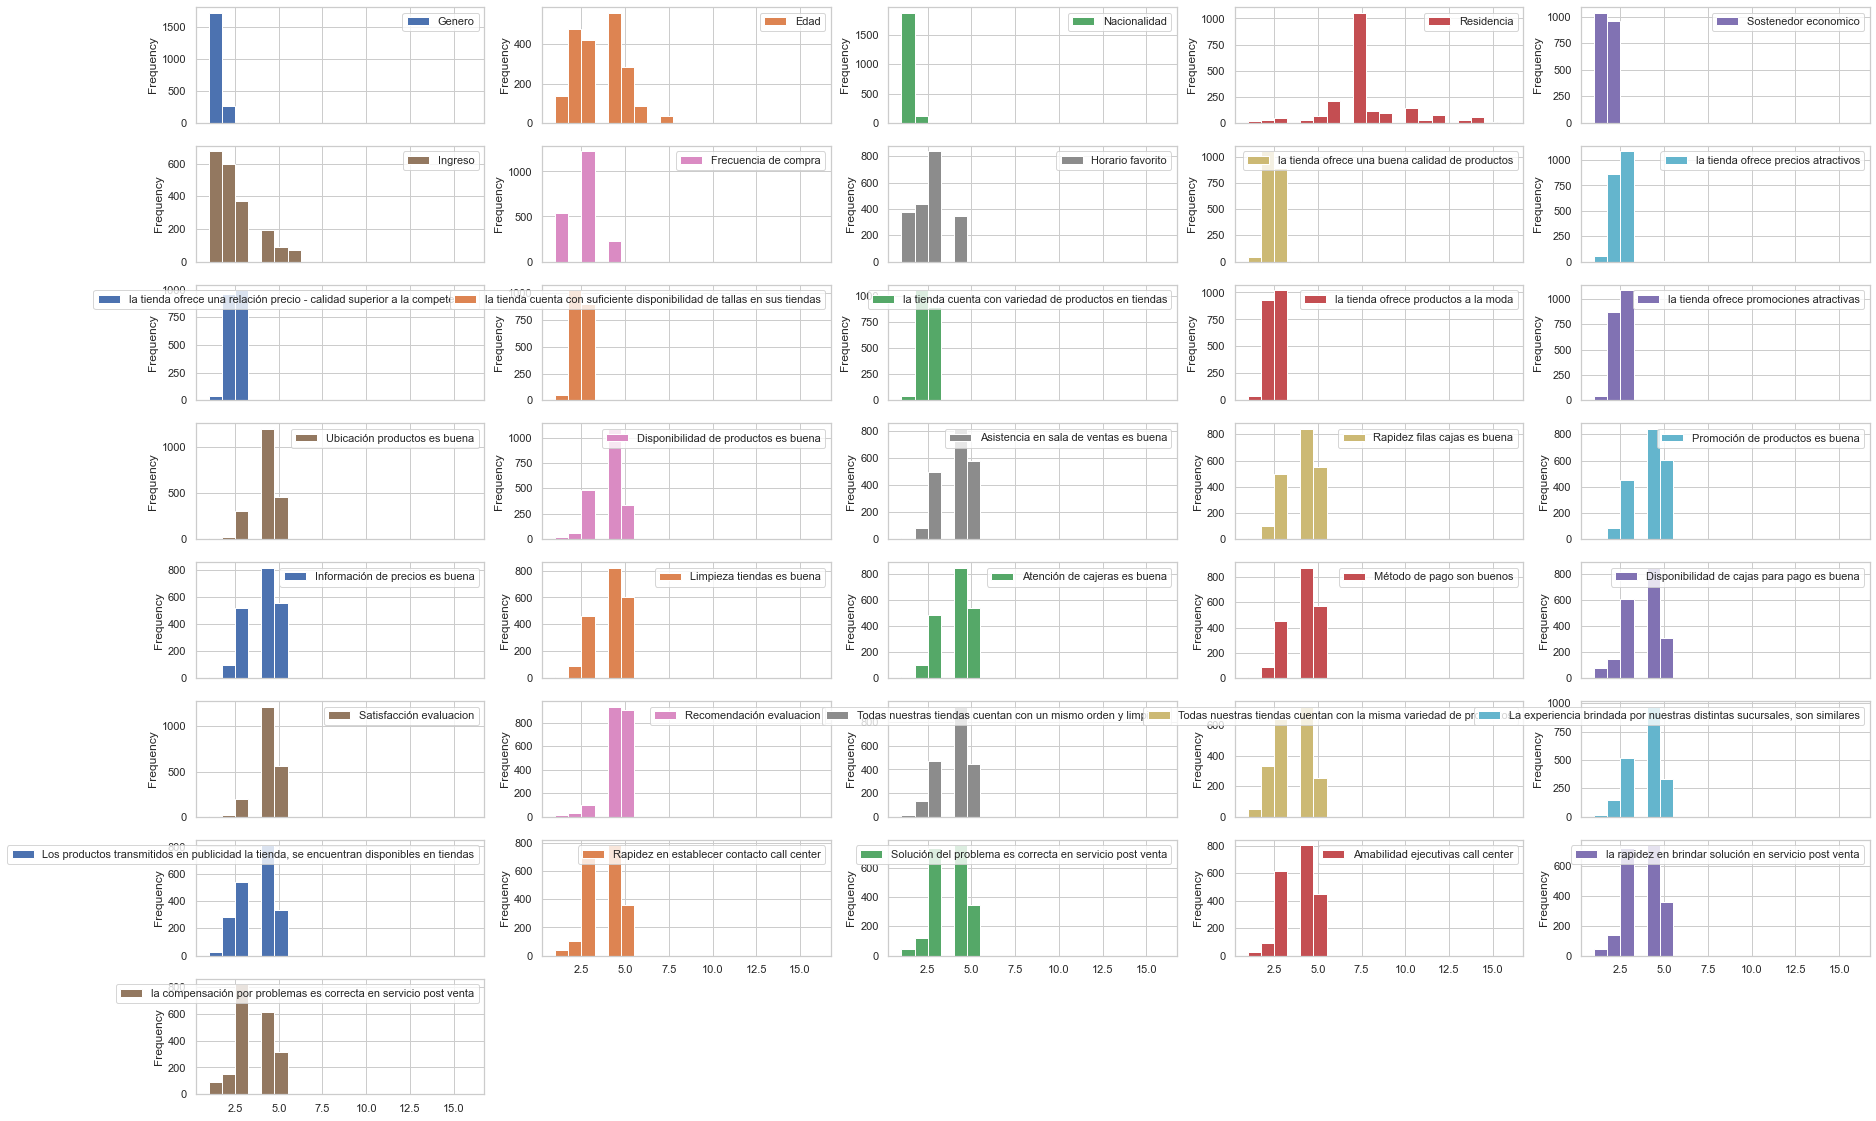

In [7]:
df.columns = ['P{}'.format(f.split('P')[1].zfill(2)) if f.startswith('P') else f for f in df.columns]

df_ = df.copy()
cols = dict(zip(dict_col.Pregunta, dict_col.pregunta))
df_.rename(columns=cols, inplace=True)
df_.plot.hist(bins=20, subplots=True, layout=(8, 5), figsize=(30, 20))

Las variables DX, no tienen una explicación explícita, por lo que no serán utilizadas (a razón de no saber exactamente que significan).

Las variables PXX, en general muestran una tendencia a los valores intermedios, respuestas neutrales (tipo 3), excepto para algunas variables.

## Modelo

Ahora se quiere estudiar como las variables afectan 2 temas de vital importancia, la satisfacción total de los clientes y si estos recomendarían (o no) la tienda visitada. Para cada uno de estos 2 indicadores, corra una regresión que determine que variables son más significativas y explique cómo varían sus resultados respecto a la edad.
- Escoja de manera manual, que variables debe incluir y cuales no a su regresión.
- Concluya en base a los resultados de cada modelo.

Estas variables corresponden a 'Satisfacción evaluacion' (P18) y 'Recomendación evaluación' (P19). Una mirada a ellas indica que las personas en general están satisfechos y recomendarían la visita a la tienda.

Como las instrucciones dicen explíticamente que la elección de predictores debe ser manual, no se usará ningún método automatizado o semi-automático.

array([[<AxesSubplot:title={'center':'P18'}>,
        <AxesSubplot:title={'center':'P19'}>]], dtype=object)

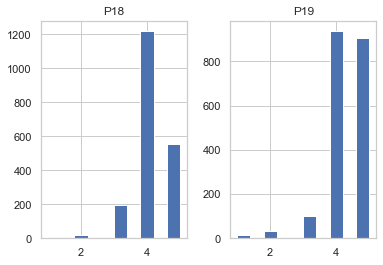

In [8]:
df[['P18', 'P19']].hist()

Es recomendable dicotomizar ambas variables, y ajustar una regresión logística. Al ser los valores neutrales, personas que no recomendarán la tienda, se sumarán a los que no lo hacen

array([[<AxesSubplot:title={'center':'P18b'}>,
        <AxesSubplot:title={'center':'P19b'}>]], dtype=object)

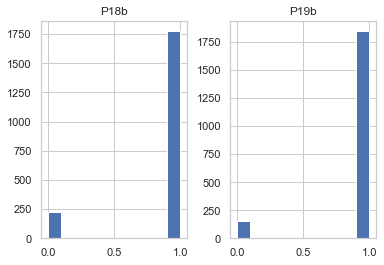

In [9]:
df['P18b'] = (df['P18'] > 3).astype(int)
df['P19b'] = (df['P19'] > 3).astype(int)
df[['P18b', 'P19b']].hist()

Se aprecia un desbalance entre ambas clases, sería recomendable balancear.

La siguiente matriz de correlación muestra las relaciones lineales existentes entre las variables respuesta y sus posibles predictores. No se aprecía una mayor autocorrelación, pero es importante tener presente la alta correlación de las variables P24 a P28. Para ambas variables, P08, P09 y P17 a P28 parecen ser los mejores predictores.

También se puede considerar usar P19 en el modelo para predecir P18 y viceversa, pero es un tema que se puede discutir dado que son variables que están muy relacionadas entre sí (no estadísticamente).

In [10]:
corr = df[[p for p in df.columns if p.startswith('P')]].dropna().corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P18b,P19b
P01,1.00,0.34,0.27,0.24,0.27,0.34,0.29,0.17,0.15,0.01,-0.04,0.01,-0.01,-0.04,0.00,-0.00,0.10,0.19,0.18,0.16,0.11,0.16,0.11,0.15,0.14,0.16,0.16,0.14,-0.03,-0.01
P02,0.34,1.00,0.26,0.24,0.26,0.33,0.45,0.18,0.19,0.03,-0.02,0.03,0.01,0.01,0.03,-0.03,0.13,0.21,0.21,0.15,0.12,0.18,0.14,0.16,0.17,0.15,0.18,0.16,0.04,0.07
P03,0.27,0.26,1.00,0.19,0.26,0.29,0.28,0.12,0.09,0.03,-0.01,0.00,-0.00,0.01,0.03,-0.00,0.07,0.11,0.09,0.06,0.04,0.08,0.04,0.07,0.05,0.09,0.05,0.05,-0.00,-0.01
P04,0.24,0.24,0.19,1.00,0.38,0.31,0.24,0.19,0.20,0.01,-0.03,-0.01,-0.02,-0.02,0.03,-0.01,0.16,0.21,0.23,0.17,0.18,0.19,0.17,0.19,0.18,0.20,0.20,0.16,0.09,0.10
P05,0.27,0.26,0.26,0.38,1.00,0.38,0.31,0.18,0.22,0.03,-0.01,0.04,-0.05,0.01,-0.01,-0.01,0.13,0.21,0.19,0.15,0.15,0.18,0.13,0.15,0.15,0.16,0.14,0.13,0.07,0.09
P06,0.34,0.33,0.29,0.31,0.38,1.00,0.43,0.25,0.24,0.03,-0.02,-0.02,0.01,0.04,0.03,-0.01,0.16,0.25,0.26,0.20,0.17,0.20,0.17,0.20,0.20,0.20,0.21,0.17,0.11,0.09
P07,0.29,0.45,0.28,0.24,0.31,0.43,1.00,0.23,0.22,0.04,0.00,-0.01,0.03,0.03,0.01,-0.02,0.16,0.25,0.26,0.18,0.14,0.17,0.17,0.22,0.21,0.20,0.21,0.20,0.12,0.10
P08,0.17,0.18,0.12,0.19,0.18,0.25,0.23,1.00,0.53,-0.02,0.04,0.03,0.00,0.01,0.04,0.02,0.37,0.54,0.46,0.42,0.39,0.42,0.42,0.38,0.41,0.36,0.39,0.35,0.37,0.28
P09,0.15,0.19,0.09,0.20,0.22,0.24,0.22,0.53,1.00,0.00,-0.02,-0.00,0.06,0.02,0.05,0.02,0.38,0.51,0.43,0.36,0.41,0.42,0.46,0.36,0.40,0.35,0.40,0.37,0.34,0.28
P10,0.01,0.03,0.03,0.01,0.03,0.03,0.04,-0.02,0.00,1.00,-0.01,-0.00,0.01,0.00,-0.02,0.06,-0.01,-0.01,-0.02,-0.01,-0.01,-0.03,0.01,-0.01,-0.01,0.00,-0.01,-0.00,0.00,-0.01


### Satisfacción

In [11]:
vars_usar = [p for p in df.columns if p.startswith('P') and p not in ['P18', 'P18b', 'P19b']]
dfn = df.dropna()
df0 = dfn[dfn['P18b'] == 0]
df1 = dfn[dfn['P18b'] == 1]

# Upsampling de los valores 0
df0_remuestreada = resample(df0, n_samples=df1.shape[0], random_state=0, replace=True)
df_upsampled = pd.concat([df1, df0_remuestreada])

# Selección de variables a usar
X = df_upsampled[vars_usar]
X = X[['P08', 'P09', 'P17', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28']]
y = df_upsampled['P18b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

# Modelo logístico
fit_1 = sm.Logit(y_train, X_train)
fit_1 = fit_1.fit()
display(fit_1.summary2())

Optimization terminated successfully.
         Current function value: 0.650670
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.061     
Dependent Variable: P18b             AIC:              2993.0550 
Date:               2021-10-21 11:55 BIC:              3067.5701 
No. Observations:   2280             Log-Likelihood:   -1483.5   
Df Model:           12               LL-Null:          -1579.8   
Df Residuals:       2267             LLR p-value:      1.0949e-34
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
P08       -0.1995     0.0701   -2.8448   0.0044   -0.3370   -0.0621
P09       -0.0161     0.0661   -0.2434   0.8077   -0.1457    0.1135
P17        0.4087     0.0498    8.2057   0.0000    0.3111    0.5063
P19        0.2317     0.0580    3.9932   0.0001    0.1180    0.3454
P20       -0.2239     0.0605   -3.6988   0.0002   -0.3425   -0.1052
P21       -0.0346     0.0609   -0.5687   0.5696   -0.1539    0.0847
P22       -0.2168     0.0665   -3.2594   0.0011   -0.3472   -0.0864
P23        0.1786     0.0573    3.1172   0.0018    0.0663    0.2910
P24       -0.4887     0.0811   -6.0254   0.0000   -0.6477   -0.3297
P25        0.2637     0.0930    2.8339   0.0046    0.0813    0.4460
P26       -0.0489     0.0673   -0.7268   0.4674   -0.1809    0.0830
P27        0.2413     0.0955    2.5269   0.0115    0.0541    0.4284
P28        0.0104     0.0717    0.1453   0.8844   -0.1300    0.1509
=================================================================

"""

Dejando solo las variables significativas:

In [12]:
# Selección de variables a usar
X = df_upsampled[vars_usar]
X = X[['P08', 'P17', 'P19', 'P20', 'P22', 'P23', 'P24', 'P25', 'P27']]
y = df_upsampled['P18b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

# Modelo logístico
fit_1 = sm.Logit(y_train, X_train)
fit_1 = fit_1.fit()
sum1 = fit_1.summary2()
display(sum1)

Optimization terminated successfully.
         Current function value: 0.650879
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.061     
Dependent Variable: P18b             AIC:              2986.0090 
Date:               2021-10-21 11:55 BIC:              3037.5963 
No. Observations:   2280             Log-Likelihood:   -1484.0   
Df Model:           8                LL-Null:          -1579.8   
Df Residuals:       2271             LLR p-value:      3.6695e-37
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
P08       -0.2146     0.0638   -3.3626   0.0008   -0.3396   -0.0895
P17        0.4054     0.0495    8.1988   0.0000    0.3085    0.5024
P19        0.2300     0.0557    4.1304   0.0000    0.1209    0.3392
P20       -0.2365     0.0572   -4.1335   0.0000   -0.3486   -0.1243
P22       -0.2383     0.0620   -3.8411   0.0001   -0.3599   -0.1167
P23        0.1698     0.0543    3.1279   0.0018    0.0634    0.2762
P24       -0.4892     0.0804   -6.0820   0.0000   -0.6469   -0.3316
P25        0.2547     0.0899    2.8332   0.0046    0.0785    0.4309
P27        0.2266     0.0845    2.6805   0.0074    0.0609    0.3923
=================================================================

"""

Confusion Matrix :
[[271 193]
 [167 347]]
Accuracy Score : 0.6319018404907976
Report : 
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       464
           1       0.64      0.68      0.66       514

    accuracy                           0.63       978
   macro avg       0.63      0.63      0.63       978
weighted avg       0.63      0.63      0.63       978



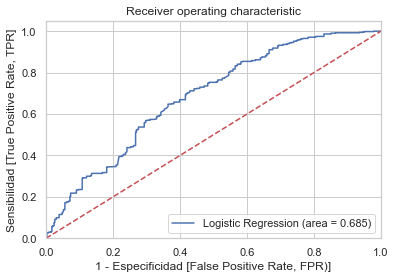

In [13]:
y_predicted = (fit_1.predict(X_test) >= .55)*1
logistic_CM = confusion_matrix(y_test, y_predicted)
  
print('Confusion Matrix :')
print(logistic_CM) 
print('Accuracy Score :',accuracy_score(y_test, y_predicted))
print('Report : ')
print(classification_report(y_test, y_predicted))

logit_roc_auc = roc_auc_score(y_test, fit_1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, fit_1.predict(X_test))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidad [False Positive Rate, FPR)]')
plt.ylabel('Sensibilidad [True Positive Rate, TPR]')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

El modelo no es muy bueno, pero tiene buen comportamiento y las métricas son balanceadas. Hay varias cosas que se pueden probar para mejorar (modificar variables, métodos de ensamblaje, remuestreo, etc), pero por razones de tiempo no se realizarán.

### Recomendación

In [14]:
vars_usar = [p for p in df.columns if p.startswith('P') and p not in ['P19', 'P18b', 'P19b']]
dfn = df.dropna()
df0 = dfn[dfn['P19b'] == 0]
df1 = dfn[dfn['P19b'] == 1]

# Upsampling de los valores 0
df0_remuestreada = resample(df0, n_samples=df1.shape[0], random_state=0, replace=True)
df_upsampled = pd.concat([df1, df0_remuestreada])

# Selección de variables a usar
X = df_upsampled[vars_usar]
X = X[['P08', 'P09', 'P17', 'P18', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28']]
y = df_upsampled['P19b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

# Modelo logístico
fit_1 = sm.Logit(y_train, X_train)
fit_1 = fit_1.fit()
display(fit_1.summary2())

Optimization terminated successfully.
         Current function value: 0.648100
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.065     
Dependent Variable: P19b             AIC:              3097.9955 
Date:               2021-10-21 11:55 BIC:              3173.0139 
No. Observations:   2370             Log-Likelihood:   -1536.0   
Df Model:           12               LL-Null:          -1642.6   
Df Residuals:       2357             LLR p-value:      6.1132e-39
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
P08       -0.4408     0.0699   -6.3098   0.0000   -0.5778   -0.3039
P09       -0.0404     0.0653   -0.6184   0.5363   -0.1683    0.0876
P17        0.1868     0.0534    3.4986   0.0005    0.0822    0.2915
P18        0.5468     0.0767    7.1261   0.0000    0.3964    0.6972
P20       -0.3390     0.0623   -5.4434   0.0000   -0.4611   -0.2170
P21        0.1454     0.0621    2.3401   0.0193    0.0236    0.2671
P22       -0.2444     0.0682   -3.5863   0.0003   -0.3780   -0.1108
P23        0.0814     0.0599    1.3603   0.1737   -0.0359    0.1988
P24       -0.2489     0.0860   -2.8938   0.0038   -0.4174   -0.0803
P25        0.3195     0.0948    3.3686   0.0008    0.1336    0.5054
P26       -0.1258     0.0662   -1.9004   0.0574   -0.2555    0.0039
P27        0.3061     0.0972    3.1487   0.0016    0.1155    0.4966
P28       -0.0280     0.0694   -0.4037   0.6865   -0.1640    0.1080
=================================================================

"""

Dejando solo las variables significativas

In [15]:
# Selección de variables a usar
X = df_upsampled[vars_usar]
X = X[['P08', 'P17', 'P18', 'P20', 'P21', 'P22', 'P24', 'P25', 'P27']]
y = df_upsampled['P19b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

# Modelo logístico
fit_1 = sm.Logit(y_train, X_train)
fit_1 = fit_1.fit()
sum2 = fit_1.summary2()
display(sum2)

Optimization terminated successfully.
         Current function value: 0.649352
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.063     
Dependent Variable: P19b             AIC:              3095.9306 
Date:               2021-10-21 11:55 BIC:              3147.8664 
No. Observations:   2370             Log-Likelihood:   -1539.0   
Df Model:           8                LL-Null:          -1642.6   
Df Residuals:       2361             LLR p-value:      1.8871e-40
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
P08       -0.4343     0.0650   -6.6849   0.0000   -0.5616   -0.3069
P17        0.1849     0.0522    3.5408   0.0004    0.0825    0.2872
P18        0.5262     0.0741    7.1003   0.0000    0.3809    0.6714
P20       -0.3534     0.0614   -5.7550   0.0000   -0.4737   -0.2330
P21        0.1586     0.0577    2.7485   0.0060    0.0455    0.2717
P22       -0.2575     0.0644   -4.0021   0.0001   -0.3837   -0.1314
P24       -0.2400     0.0844   -2.8428   0.0045   -0.4054   -0.0745
P25        0.2868     0.0929    3.0873   0.0020    0.1047    0.4689
P27        0.2434     0.0872    2.7924   0.0052    0.0726    0.4142
=================================================================

"""

Confusion Matrix :
[[348 146]
 [187 335]]
Accuracy Score : 0.672244094488189
Report : 
              precision    recall  f1-score   support

           0       0.65      0.70      0.68       494
           1       0.70      0.64      0.67       522

    accuracy                           0.67      1016
   macro avg       0.67      0.67      0.67      1016
weighted avg       0.67      0.67      0.67      1016



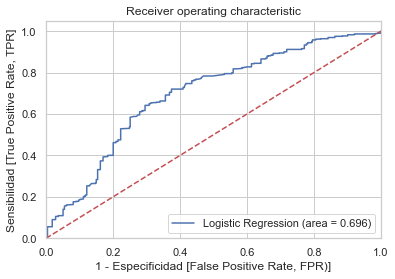

In [16]:
y_predicted = (fit_1.predict(X_test) >= .55)*1
logistic_CM = confusion_matrix(y_test, y_predicted)
  
print('Confusion Matrix :')
print(logistic_CM) 
print('Accuracy Score :',accuracy_score(y_test, y_predicted))
print('Report : ')
print(classification_report(y_test, y_predicted))

logit_roc_auc = roc_auc_score(y_test, fit_1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, fit_1.predict(X_test))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidad [False Positive Rate, FPR)]')
plt.ylabel('Sensibilidad [True Positive Rate, TPR]')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

El modelo es muy similar al anterior, y tiene características muy similares

## Conclusiones

Para poder realizar recomendaciones apropiadas, es bueno volver a mirar la tabla de coeficientes del modelo

In [17]:
print('Modelo de Satisfacción')
sum1_ = sum1.tables[1].rename(index=cols).sort_values(by='Coef.')
pd.concat([sum1_, np.exp(sum1_['Coef.']).rename('%')], axis=1)

Modelo de Satisfacción


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],%
Rapidez en establecer contacto call center,-0.489202,0.080434,-6.082003,1.186905e-09,-0.646851,-0.331554,0.613115
"La experiencia brindada por nuestras distintas sucursales, son similares",-0.238304,0.062040,-3.841121,1.224736e-04,-0.359901,-0.116707,0.787963
Todas nuestras tiendas cuentan con un mismo orden y limpieza,-0.236462,0.057207,-4.133483,3.573064e-05,-0.348585,-0.124339,0.789416
Ubicación productos es buena,-0.214551,0.063806,-3.362570,7.722057e-04,-0.339607,-0.089494,0.806904
"Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas",0.169808,0.054288,3.127944,1.760334e-03,0.063407,0.276210,1.185078
la rapidez en brindar solución en servicio post venta,0.226580,0.084530,2.680465,7.351995e-03,0.060904,0.392256,1.254303
Recomendación evaluacion,0.230029,0.055692,4.130408,3.621201e-05,0.120875,0.339182,1.258636
Solución del problema es correcta en servicio post venta,0.254726,0.089908,2.833196,4.608518e-03,0.078510,0.430942,1.290108
Disponibilidad de cajas para pago es buena,0.405433,0.049451,8.198759,2.428823e-16,0.308512,0.502354,1.499952


In [18]:
print('Modelo de Recomendación')
sum2_ = sum2.tables[1].rename(index=cols).sort_values(by='Coef.')
pd.concat([sum2_, np.exp(sum2_['Coef.']).rename('%')], axis=1)

Modelo de Recomendación


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],%
Ubicación productos es buena,-0.434270,0.064963,-6.684906,2.310723e-11,-0.561595,-0.306945,0.647737
Todas nuestras tiendas cuentan con un mismo orden y limpieza,-0.353355,0.061399,-5.755046,8.661834e-09,-0.473695,-0.233015,0.702328
"La experiencia brindada por nuestras distintas sucursales, son similares",-0.257544,0.064352,-4.002096,6.278371e-05,-0.383672,-0.131416,0.772948
Rapidez en establecer contacto call center,-0.239976,0.084416,-2.842788,4.472076e-03,-0.405428,-0.074524,0.786646
Todas nuestras tiendas cuentan con la misma variedad de productos,0.158575,0.057695,2.748513,5.986634e-03,0.045495,0.271654,1.171840
Disponibilidad de cajas para pago es buena,0.184878,0.052214,3.540759,3.989782e-04,0.082540,0.287216,1.203072
la rapidez en brindar solución en servicio post venta,0.243385,0.087161,2.792378,5.232222e-03,0.072554,0.414217,1.275560
Solución del problema es correcta en servicio post venta,0.286830,0.092907,3.087290,2.019904e-03,0.104736,0.468925,1.332198
Satisfacción evaluacion,0.526164,0.074104,7.100308,1.244793e-12,0.380922,0.671406,1.692428


***IMPORTANTE***: Hay varios predictores que han mostrado valores negativos para sus coeficientes, en variables que son positivas y que uno esperaría que tuvieran un impacto positivo y no negativo. Por ejemplo, una buena ubicación de productos o un buen orden y limpieza en todas las tiendas, debiera suponer una mayor predisposición a un cliente satisfecho (por lógica), pero el modelo entrega el resultado contrario. Hay relaciones entre estas variables que hay que explorar, para poder solucionar el problema de mejor manera (realizar agrupamiento, componentes principales y probar métodos de selección más automatizados por ejemplo), pero por razones de tiempo no se ahondará más en ello. A veces esto puede ocurrir por la correlación cruzada entre los predictores, pero varias pruebas fueron realizadas y en todas se obtuvieron coeficientes negativos en alguna variable.

Ambos tienen varios predictores en común y como era de esperar, la satisfacción induce a la recomendación y por ende, una recomendación es sinónimo también de satisfacción.

Ambas tablas están ordenadas desde aquellas variables que afectan negativamente, hacia aquellas que la afectan positivamente. La última columna muestra el % de incremento/deremento de las chances de un cliente satisfecho o que hace una recomendación (manteniendo lo demás constante). Debido a las características del modelo, sólo se considerarán las variables positivas.

Las principales recomendaciones y conclusiones son:
1. Tener una buena disponibilidad de cajas para pago es importante. Aumenta las chances de satisfacción de un cliente en un 50% y la recomendación en un 20%
1. Tener un buen servicio de posventa es clave: tanto para la rapidez (25% a 27% de aumento de las chances de un cliente satisfecho o que haga una recomendación), como para una solución correcta (29% a 33% de aumento de las chances de un cliente satisfecho o que haga una recomendación).
1. Tener los productos publicitados en la tienda (stock), aumentan las chances de una cliente satisfecho en un 18%
1. Tener la misma variedad de productos en las diferentes tiendas aumenta las chances de recomendación en un 17%

